In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls
!pwd
%cd /content/drive/My Drive/MNIST/mnist-2

drive  sample_data
/content
/content/drive/My Drive/MNIST/mnist-2


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt 

import cv2

In [ ]:
(train_images, train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()
# 加载数据集

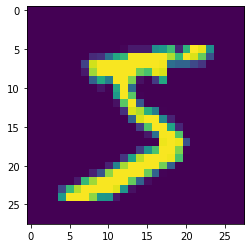

In [ ]:
plt.imshow(train_images[0])

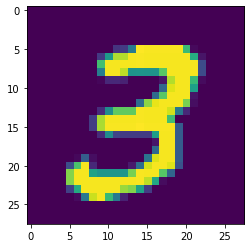

In [ ]:
plt.imshow(train_images[7])

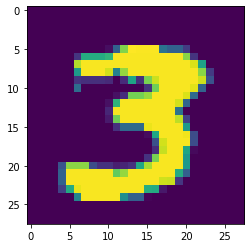

In [ ]:
plt.imshow(train_images[27])

In [ ]:
train_images = train_images.reshape(60000, 28*28)
test_images = test_images.reshape(10000, 28*28)
#维度变换

In [ ]:
train_images = train_images/255
test_images = test_images/255

In [ ]:
distance = np.sum(np.abs(train_images[7]-train_images[27]))
print(distance)

70.34901960784313


In [ ]:
train_labels = np.array(pd.get_dummies(train_labels))
test_labels = np.array(pd.get_dummies(test_labels))

In [ ]:
train_labels[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [ ]:
real = np.argmax(train_labels[0])
print(real)

5


## 最近邻分类


In [ ]:
test = 10
acc = 0

for i in range(test):
  test_data = test_images[i]
  train_data = train_images[:20000, :]
  # 选择使用的训练集数量
  data = np.abs(test_data-train_data)
  print("data",data," data.shape", data.shape)
  data_1 = np.sum(np.abs(test_data-train_data))
  print("data_1",data_1," data_1.shape", data_1.shape)

  distance = np.argmin(np.sum(np.abs(test_data-train_data),axis=1))
  #计算L1距离
  print("distance",distance)

  data_2 = train_labels[distance]
  print("data_2",data_2)

  predict = np.argmax(train_labels[distance])
  print("predict",predict)

  # 取得距离最近图片标签
  real = np.argmax(test_labels[i])
  # 取得真实的标签
  if predict == real:
  # 判断真实和预测
    acc += 1
    # 准确数增加

  print("预测",predict,"真实",real)

print("准确率",acc/test)

data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]  data.shape (20000, 784)
data_1 2420915.2784313676  data_1.shape ()
distance 16186
data_2 [0 0 0 0 0 0 0 1 0 0]
predict 7
预测 7 真实 7
data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]  data.shape (20000, 784)
data_1 2984696.9960784353  data_1.shape ()
distance 16902
data_2 [0 0 1 0 0 0 0 0 0 0]
predict 2
预测 2 真实 2
data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]  data.shape (20000, 784)
data_1 2132236.7686274475  data_1.shape ()
distance 15224
data_2 [0 1 0 0 0 0 0 0 0 0]
predict 1
预测 1 真实 1
data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. 